In [1]:
import fyp as rot
import networkx as nx

# Computations on Embedded Graphs

Aim: Do computations on embedded graphs

Topics
1. Graphs
2. Surfaces
3. Embedded Graphs
4. Computing on Embedded Graphs in Python

## Graphs 

A multigraph is a set of vertices and a set of pairs of vertices called edges. It allows loops and mutliple edges between vertices, the edges are not ordered pairs.

<div>
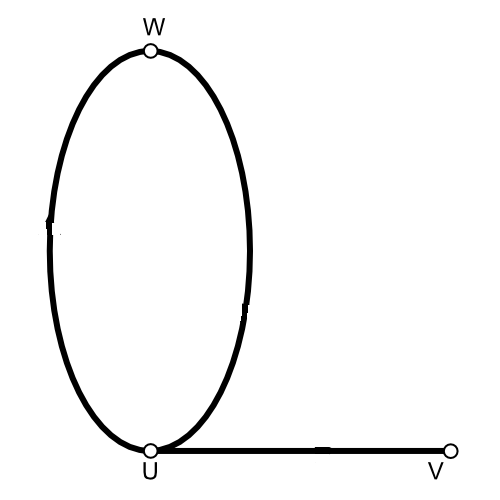
</div>


The connected components of a graph

<div>
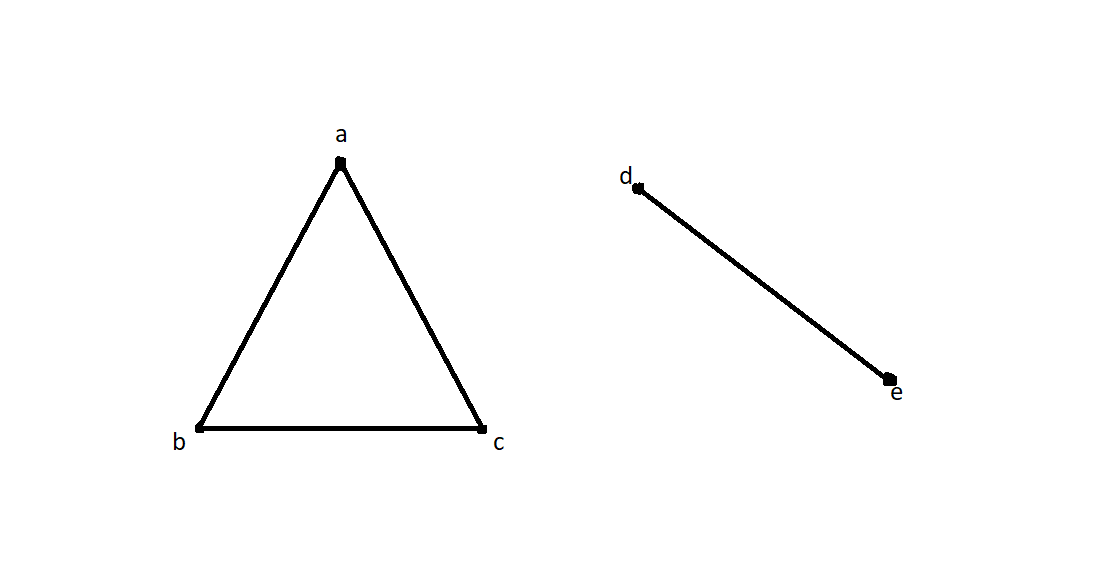
</div>

## Surfaces

What is a closed orientable surface?

<div>
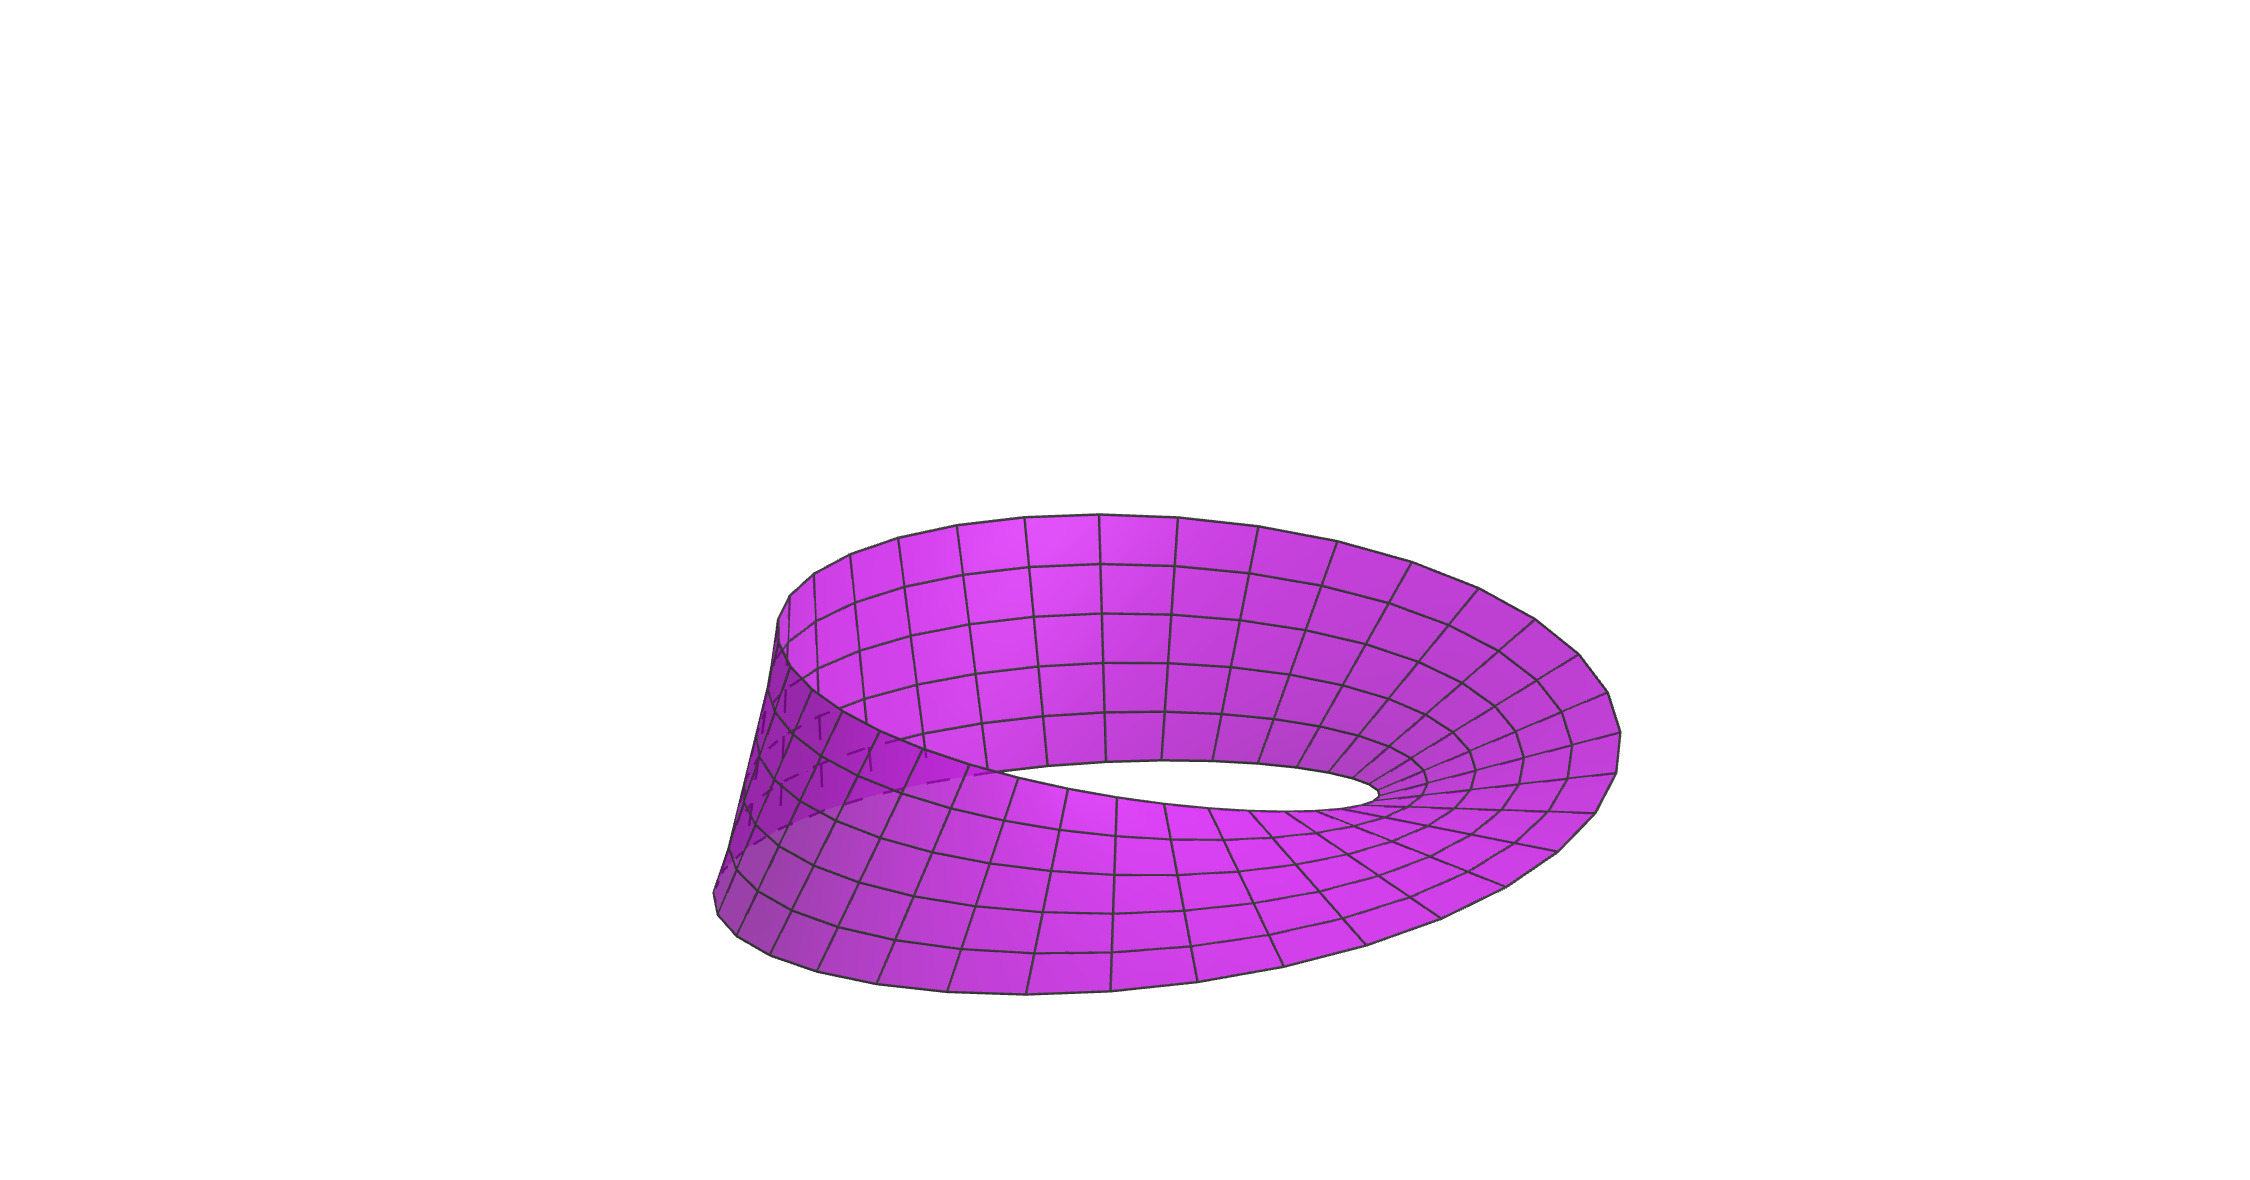
</div>

<div>
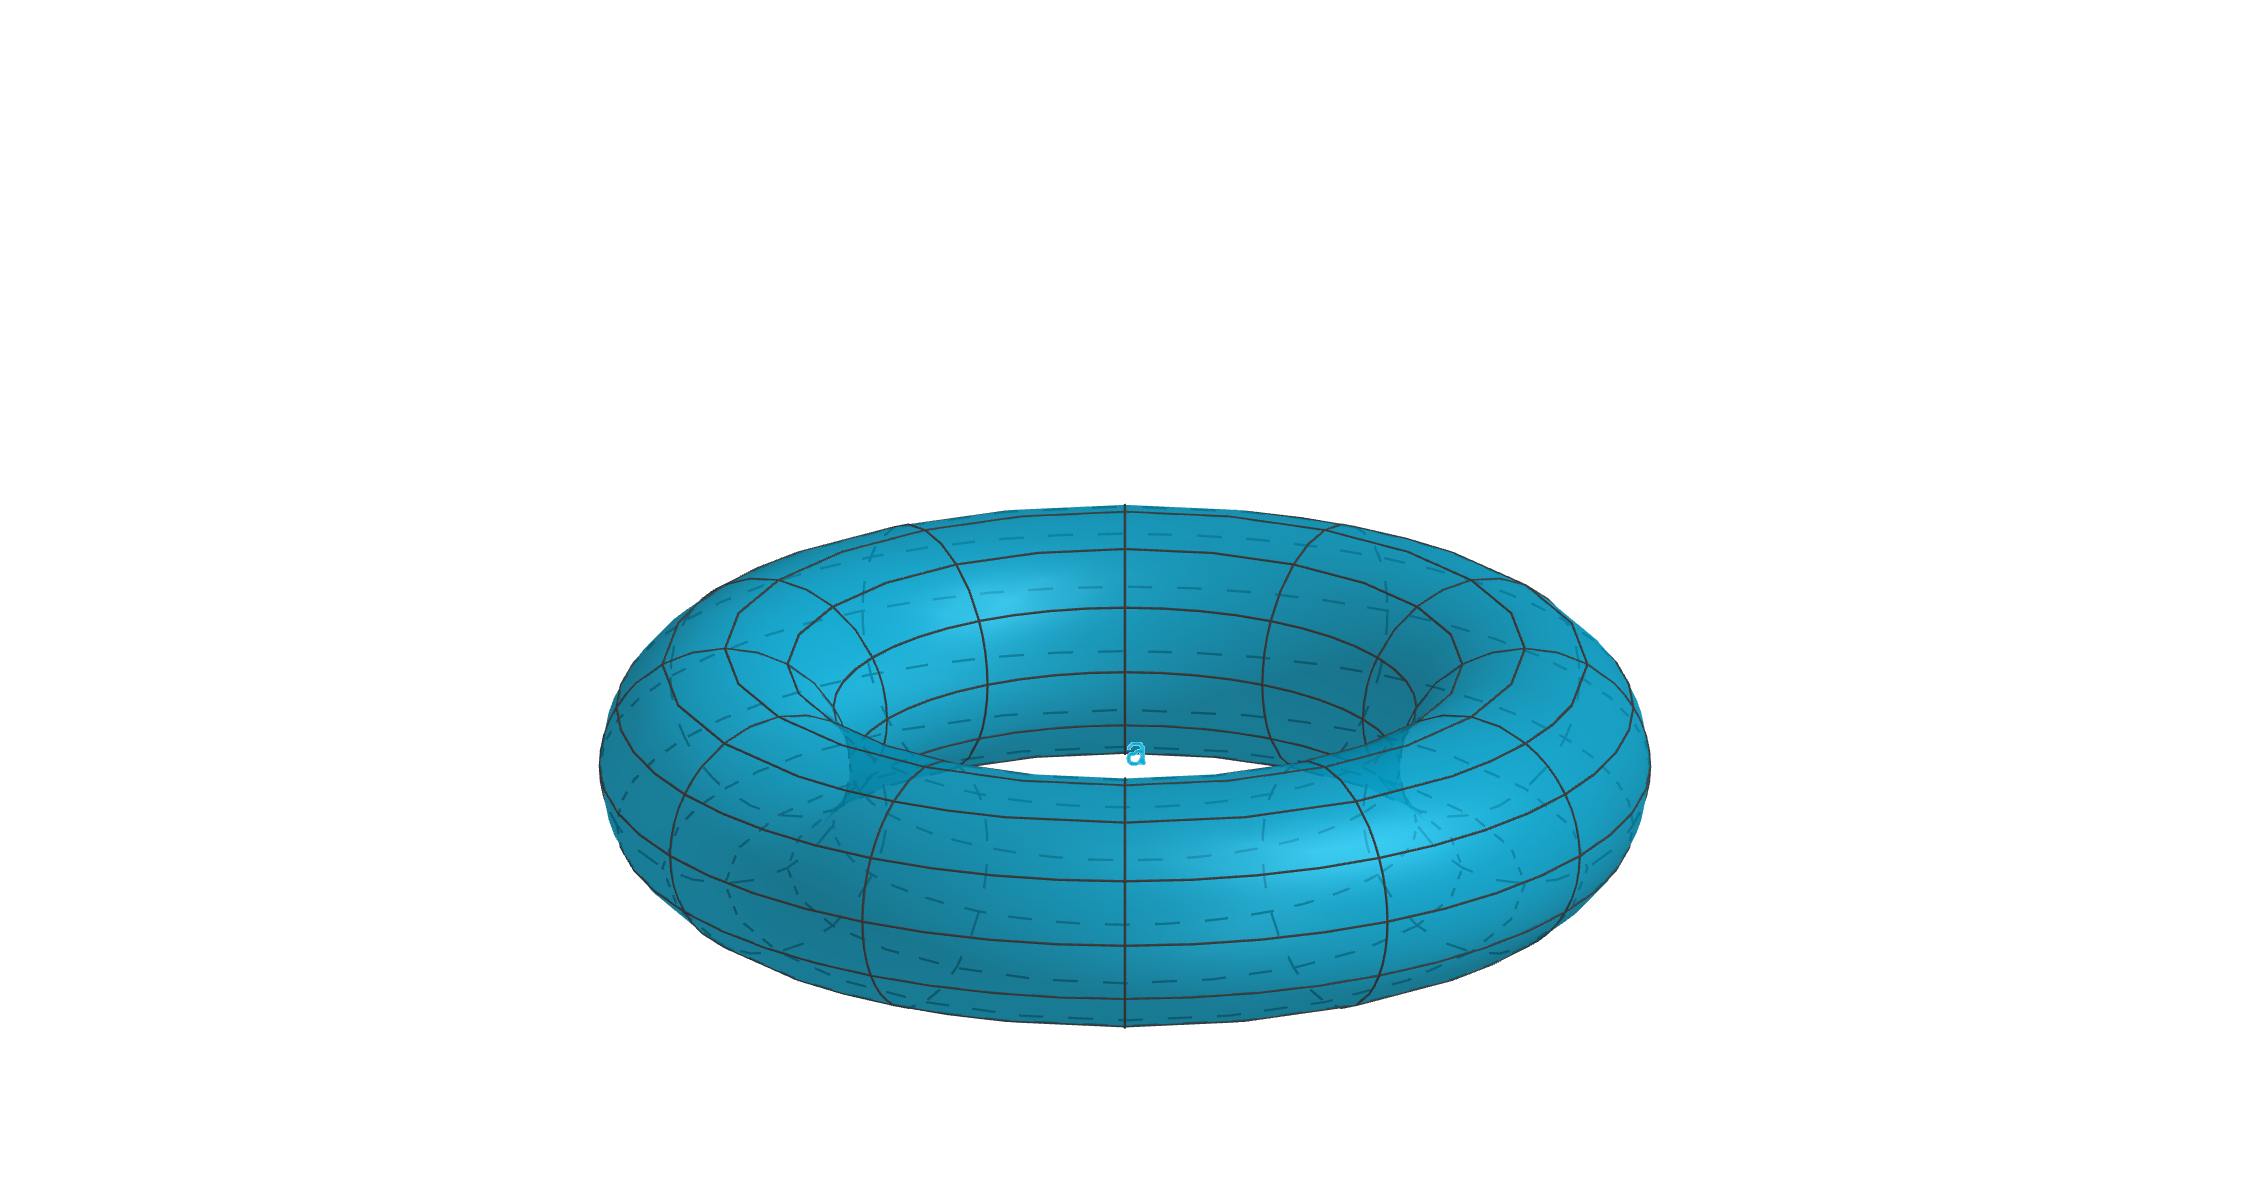
</div>

The sphere, the torus, the double torus, the triple torus and so on, commonly
denoted $S_0,S_1,S_2,S_3,. . .$ respectively, are all closed, orientable surfaces.

Fact: Every connected closed orientable surface is homeomorphic to exactly one of these $S_i$.


<div>
<img src="S_i.png" width="50%"/>
</div>

The surfaces $S_0,S_1,S_2$,...  form a complete set of representatives of the homeomorphism types of closed, connected, orientable surfaces.  Moreover,  they  are  distinguishable  by  a  single  integer-valued  invariant,  the  Euler characteristic.


What is the genus of a closed, orientable surface?

<div>
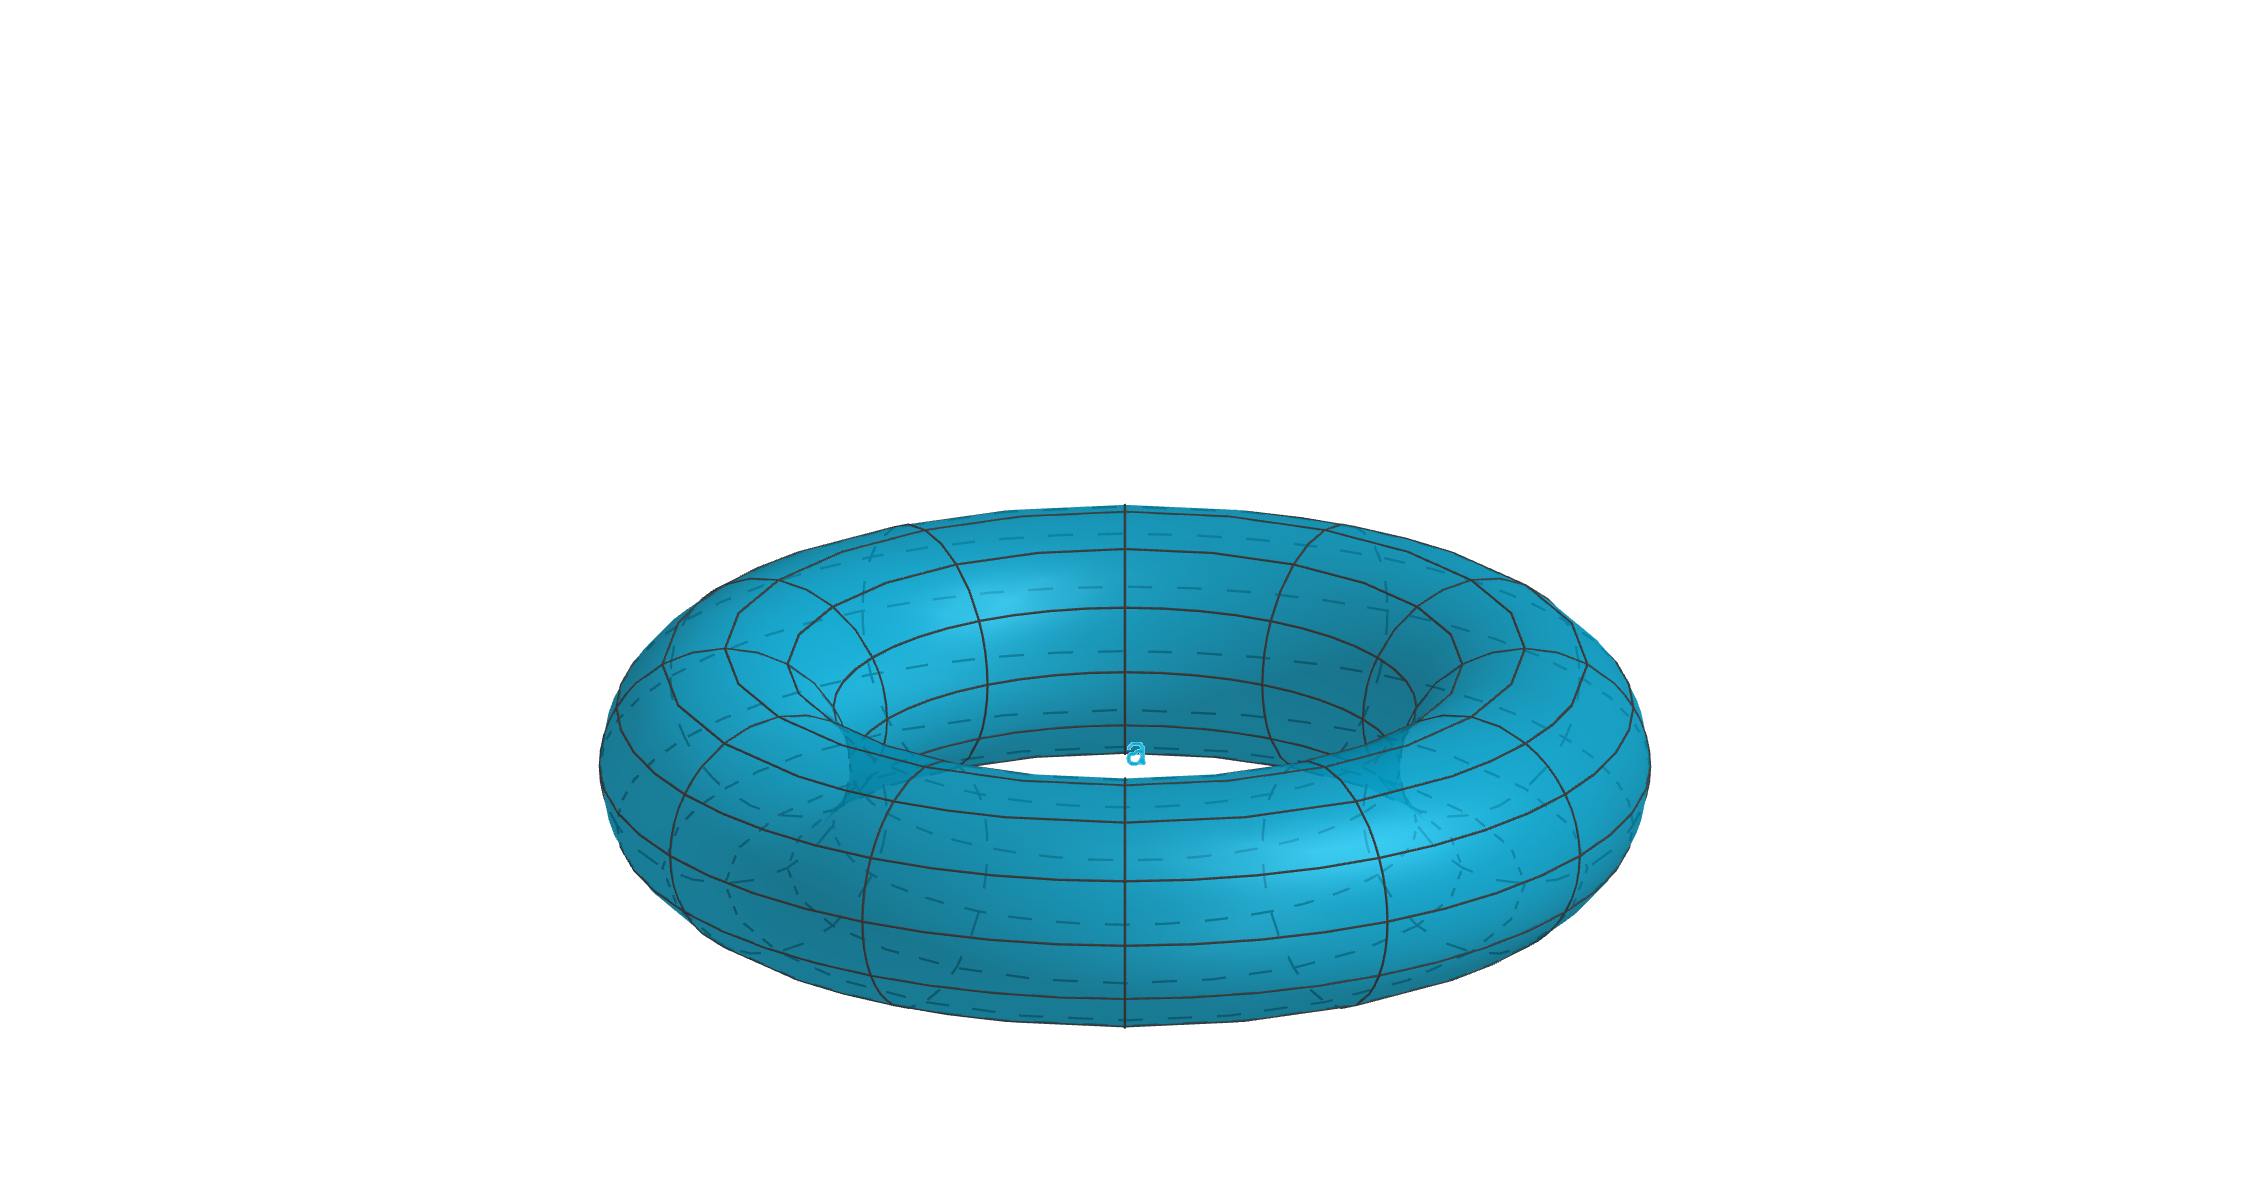
</div>

The Euler characteristic of an orientable surface is

$χ(S_g) = 2−2g$ 

where $g$ is the genus of the surface. 



If two closed, connected, orientable surfaces have the same Euler characteristic they are homeomorphic.

<div>
<img src="Table.png" width="100%"/>
</div>

## Embedded graphs


What is meant by an embedding of a graph into a surface?


<div>
<img src="simple%20graph%20on%20sphere%20edited.png" width="100%"/>
</div>

A cellularly embedded graph is a graph drawn on a surface such that edges only intersect at their ends, and each connected component of the complement of the graph is homeomorphic to a disc.


<div>
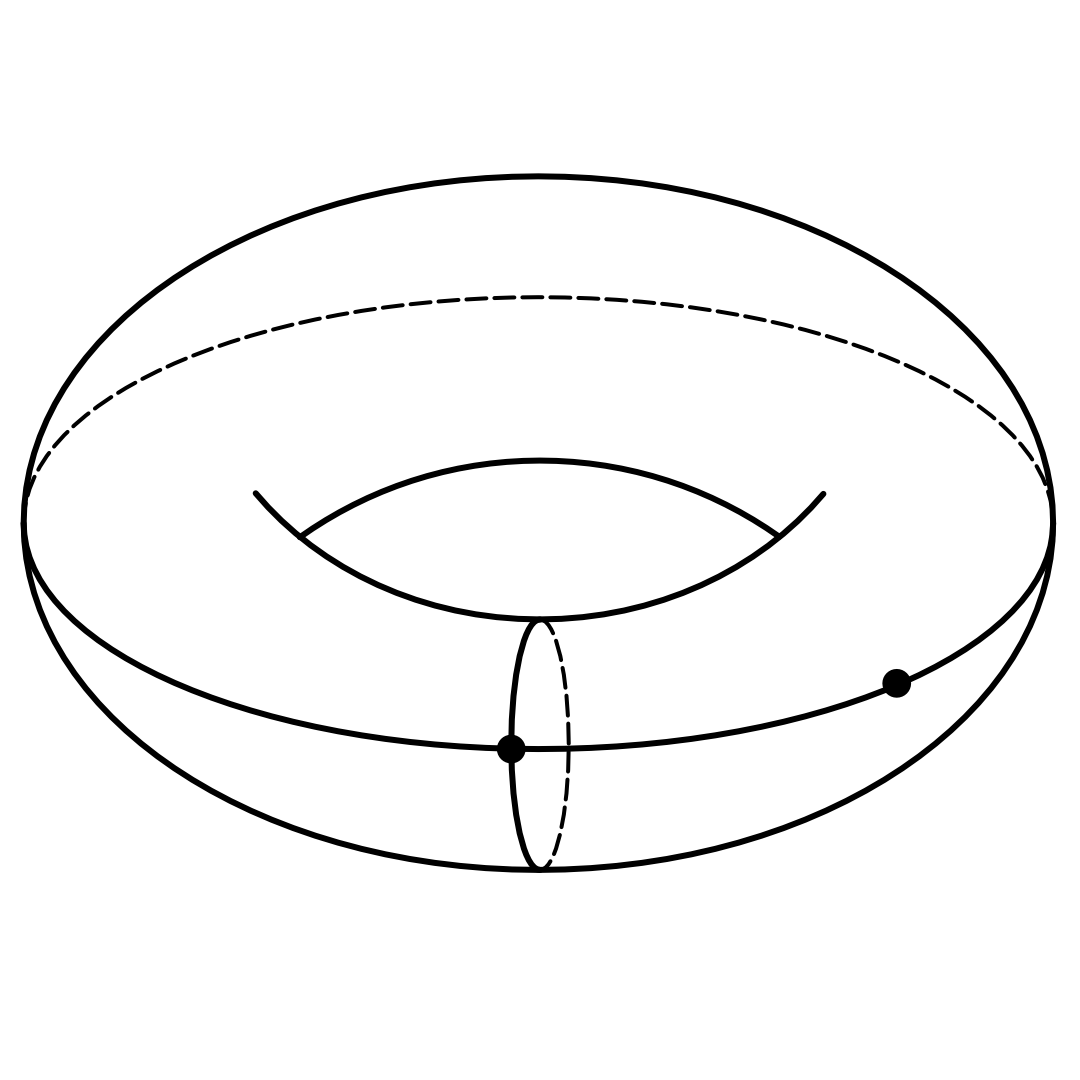
</div>

## Rotation System

A rotation system consists of an abstract graph and a cyclic ordering of the half-edges at each vertex, and a set of involutions of the half edges that correspond to the edges of the graph. 

<div>
<img src="Simple%20Rotation%20System%20image%20%281%29.png" width="85%"/>
</div>

This is the rotation system for this embedded graph

v = [(1,9,8), (2,3), (4,6,10), (5,7)]

e = [(1,2), (3,4), (5,6), (7,8), (9,10)]

The relationship between cellularly embedded graphs and rotation systems.

Can every graph that's embedded on a torus also be embedded on a sphere?

Here is a motivating example.

<div>
<img src="Cellularly%20Embedded%20edited.png" width="50%"/>
</div>

<div>
<img src="RotationOfCell.png" width="50%"/>
</div>

With the labels shown for the embedded graphs above, these are the two rotation systems.

For the embedding on the sphere:

v = [(6,1,4,5),(3,2)]

e = [(1,2),(3,4),(6,5)]

For the embedding on a torus:

v = [(1,6,4,5), (3,2)]

e = [(1,2),(3,4),(6,5)]

The following graph embedded on a torus can be embedded on a double torus, but can it be embedded on a sphere?

<div>
<img src="torus%20graph.png" width="50%"/>
</div>

How do we know what surface a rotation system is embedded on?

We need the genus of the embedded graph.

$g = 1 - 1/2 * (|V| - |E| + |F|)$

The genus of a graph corresponds with the earlier definition of a genus of a surface.

The genus of a graph is the smallest integer n such that the graph can be drawn without crossing itself on an oriented surface of genus n.

## Our rotationSystem class, how we work with rotation systems in python

The rotation system class takes in 2 lists. One with the vertex permutations, represented by a list tuples of the half edges. The other list is the edge involutions, this is represented by tuples of the half edges.

An example of this

<div>
<img src="example3.jpg" width="50%"/>
</div>

In [2]:
vertices = [(1,2),(3,12,4),(5,7,6),(8,9),(10,11)] 
edges = [(2,3),(4,5),(6,1),(7,8),(9,10),(11,12)]   

The class can then do multiple different operations

In [3]:
rt = rot.rotationSystem(vertices,edges)
rt.displayCycles()

Number of 3-cycles is: 1
Number of 4-cycles is: 1
Number of 5-cycles is: 1


In [4]:
rt.findGenus()

0.0

The graph recovered from the rotation system

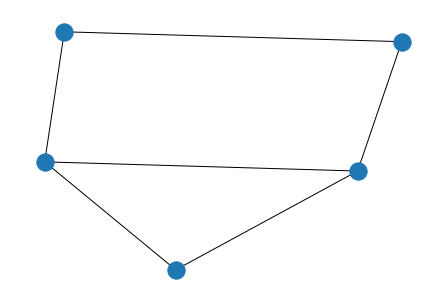

In [5]:
G = nx.MultiGraph(rt.conversion())
nx.draw(G)

## How we find all the boundary cycles in a graph

To find one walk 
1. Given a half edge $h$, in a clockwise order we find its vertex permutation.
2. We then find its edge involution
3. Then we finds it's vertex permutation and repeat this process until we find $h$ again.

To find all the walks we take the next vertex permutations and repeat the above, each one will give us a unique boundary cycle.

<div>
<img src="rotationByHand.png" width="50%"/>
</div>


In [6]:
vertices = [(1,2,3),(4,5),(6,7,8),(9,10)]
edges = [(2,4),(5,7),(6,3),(1,10),(9,8)]
rt = rot.rotationSystem(vertices,edges)

In [7]:
rt.findAllWalks()

[[2, 3, 6, 7, 5, 4, 2], [4, 5, 7, 8, 9, 10, 1, 2, 4], [3, 1, 10, 9, 8, 6, 3]]

## Faces and the Genus

The faces in a graph using a rotation system can be found by multiplying the permutations of the edges and vertices

We can find the genus of a graph $g = 1 − \frac{1}{2}(|V| − |E| + |F|)$ where $V$ is the vertices, $E$ is the edges and $F$ is the faces.

We can then determine if a graph $G$ is embedded in a planar surface, torus ect by the genus. 

i.e. a graph with a genus 1 is embedded in a torus, while one with a genus 0 is embedded in a planar surface

An example of this is a rotation system as seen earlier.

<div>
<img src="RotationOfCell.png" width="50%"/>
</div>

In [8]:
v = [(1,4,5,6),(3,2)]
e = [(1,2),(3,4),(6,5)]
r = rot.rotationSystem(v,e)

In [9]:
r.displayFaces()

Number of faces is: 3


In [10]:
r.findGenus()

0.0

We can see that this graph is different from one embedded on the torus

<div>
<img src="Cellularly%20Embedded%20edited.png" width="40%"/>
</div>

In [11]:
v = [(1,6,4,5), (3,2)]
e = [(1,2),(3,4),(6,5)]
r = rot.rotationSystem(v,e)

In [12]:
r.displayFaces()

Number of faces is: 1


In [13]:
r.findGenus()

1.0

## An interesting example

Here is a graph embedded in a torus.

<div>
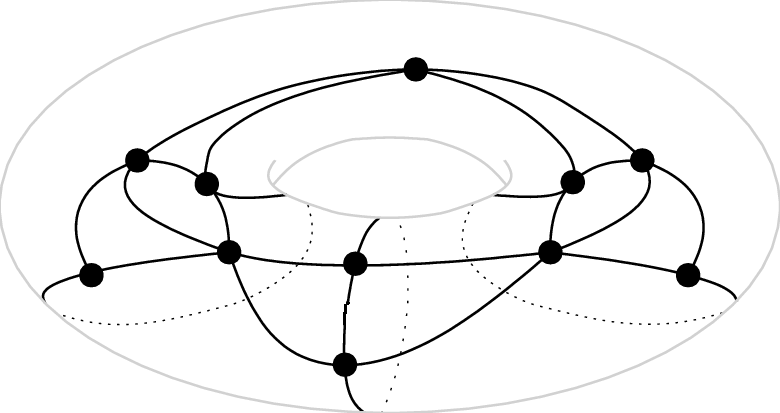
</div>

In [14]:
v = [(1,2,3,4),(34,37,36,35),(30,31,32,33,44),(28,27,29),(26,25,43,42),
     (39,40,41,38),(23,24,21,22),(20,19,18,17),(15,16,14,13),(5,6,7,8,9),
     (10,11,12)]
e = [(1,37),(35,3),(2,44),(33,34),(4,5),(6,36),(13,12),(10,9),(8,18),(11,19),
     (16,17),(7,14),(20,21),(15,22),(24,25),(23,40),(39,43),(26,27),(42,31),
     (38,32),(29,30),(28,41)]
r = rot.rotationSystem(v,e)

In [15]:
r.displayCycles()

Number of 3-cycles is: 8
Number of 6-cycles is: 2
Number of 8-cycles is: 1


In [16]:
r.findGenus()

1.0

A graph $G$ with a genus of 1 means that the minimum surface $G$ can be embedded in is a torus, while still remaining a simple graph 

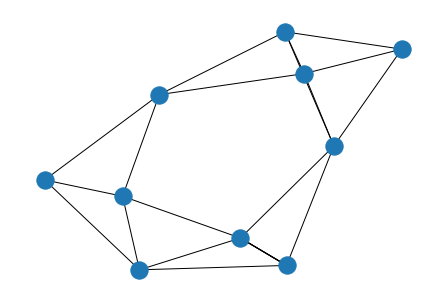

In [17]:
G = nx.MultiGraph(r.conversion())
nx.draw(G)

## Another example

In [18]:
es = [(1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14),(17,18),(19,20),(21,22),(23,24),(30,31)]
vs = [(4,14,17,5,2),(6,31,22,19,8),(1,24,7,9),(3,30,10),(11,20,18),(12,21,23,13) ]
r = rot.rotationSystem(vs,es)

In [19]:
r.findGenus()

3.0

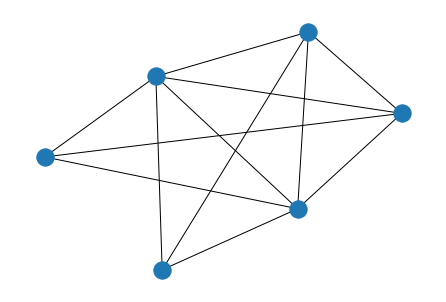

In [20]:
G = nx.MultiGraph(r.conversion())
nx.draw(G)

## Conclusion